# Exploratory Data Analysis

In [19]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

### 1. Importing 

In [20]:
#rawData = pd.read_csv("/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/RedditLarge3.csv")
rawData = pd.read_csv("/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/RedditLarge2016NoFilters.csv")
print("The data has {} rows and {} columns.".format(rawData.shape[0], rawData.shape[1]))

rawData = rawData[rawData['Flair'].notna()] # Dropping all submissions that don't have a tagged flair
rawData["Body"].fillna("", inplace = True)
rawData["Title"].fillna("", inplace = True)

rawData["text"] = rawData["Title"] + " " + rawData["Body"]

rawData.drop(['Post ID', 'Author', 'Permalink'], axis = 1, inplace=True) 
rawData.rename(columns = {'Flair':'flair'}, inplace = True) 
rawData.head(3)

The data has 737068 rows and 10 columns.


,Title,Url,Score,Publish Date,Total No. of Comments,flair,Body,text
1,TIL: The British named their emergency plans f...,https://books.google.com/books?id=keXNAwAAQBAJ...,27,2016-01-01 05:44:25,2,Non-Political,,TIL: The British named their emergency plans f...
2,[NSFW] is there decent desi porn online?,https://www.reddit.com/r/india/comments/3yyyxd...,90,2016-01-01 06:08:53,85,AskIndia,"Should be free and high standard, instead of t...",[NSFW] is there decent desi porn online? Shoul...
4,Is India ugly?,https://www.reddit.com/r/india/comments/3yz7sh...,160,2016-01-01 07:38:39,106,AskIndia,I am not talking about the natural landscape (...,Is India ugly? I am not talking about the natu...


In [21]:
print("The cleaned data has {} rows and {} columns.".format(rawData.shape[0], rawData.shape[1]))

The cleaned data has 460922 rows and 8 columns.


### 2. Class Imbalance

We check for Class (Flair) Imbalance in the dataset. Lot of submissions with similar flairs and if there are certain flairs with very few rows, it will lead to low accuracy in the classification, so we can elimiate this by two methods: either by getting more data (taken care of in the scraping script) and by considering only popular flairs.

In [22]:
# Get list of all Flair values in the dataframe

flairs = []

column_values = rawData['flair'].values
unique_values =  np.unique(column_values)

for _flair in unique_values:
    flairs.append(_flair)

len(flairs)

882

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3232 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12389 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 3232 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12389 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65377 missing from current

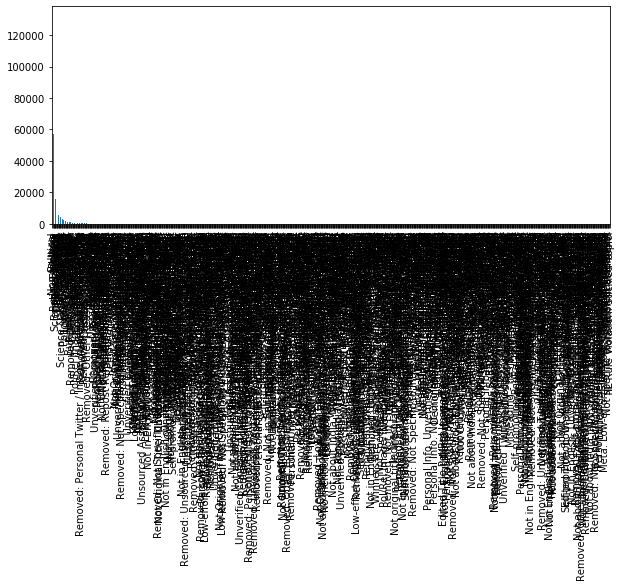

In [23]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');

The class imbalance is very clear in this plot. So, we keep the top 5 classes (becase they have more than 1000) submissions associated with them.

In [24]:
# Most frequent flairs

flairs = []

for key in rawData.flair.value_counts().head(3).keys():
    flairs.append(key)

rawData = rawData.loc[rawData['flair'].isin(flairs)];

rawData.to_csv('/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/balanced3.csv', 
               header=True, index=False) 

print("The exported data has {} rows and {} columns.".format(rawData.shape[0], rawData.shape[1]))

The exported data has 306296 rows and 8 columns.


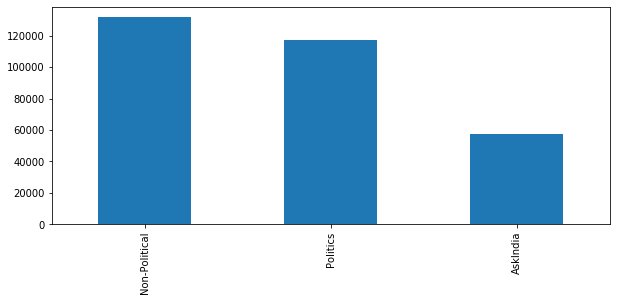

In [25]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');